In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(style="darkgrid")


In [2]:
dataframe = pd.read_csv('train.csv')
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Первичная предобработка данных

In [ ]:
# dataframe = dataframe.drop(['PassengerId','Name'], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df1 = dataframe.dropna(subset = ['Age'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


#### Преобразование признаков

In [5]:
from sklearn.model_selection import train_test_split

y = df1['Survived']
X = df1.drop(columns = ['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=52)

In [6]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
340,341,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.000,F2,S
89,90,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.050,NaN,S
554,555,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.775,NaN,S
759,760,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S


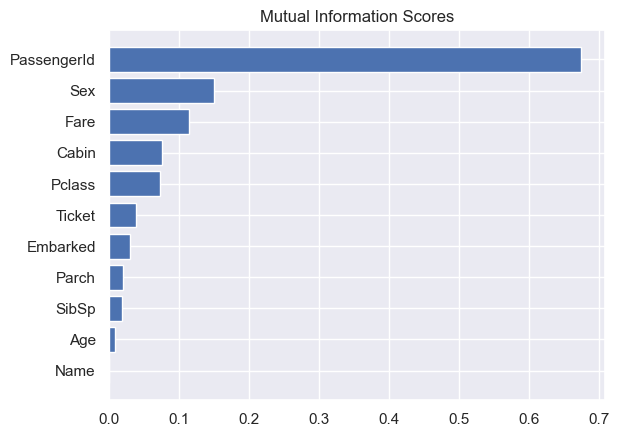

In [7]:
from sklearn.feature_selection import mutual_info_classif

# All discrete features should now have integer dtypes (double-check this before using MI!)

X_train_for_mi = X_train.copy()
for colname in X_train.select_dtypes("object"):
    X_train_for_mi[colname], _ = X_train[colname].factorize()


discrete_features = X_train.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_train_scores = make_mi_scores(X_train_for_mi, y_train, discrete_features)



def plot_mi_scores(scores):     
    scores = scores.sort_values(ascending=True)  
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plot_mi_scores(mi_train_scores)


In [ ]:
def transformation(X_train):
    ticket_counts = X_train.Ticket.value_counts()
    X_train.loc[:,'GroupSizebyTicket'] = X_train['Ticket'].map(ticket_counts)
    X_train.loc[:,'Cabinlvl'] = X_train.Cabin.str[0].fillna('NoCab')
    X_train.loc[:,'Embarked'] = X_train.Embarked.fillna('S')
    # X_train = X_train.drop(['Cabin','Ticket'], axis = 1)
    X_train['FamilySize'] = X_train['Parch'] + X_train['SibSp'] + 1
    return X_train
X_train = transformation(X_train)
# X_train.info()


In [ ]:
X_test = transformation(X_test)
# X_train.info()


MI скор, в отличие от обычной корреляции, помогает улавливать все возможные зависимости, даже нелинейные.

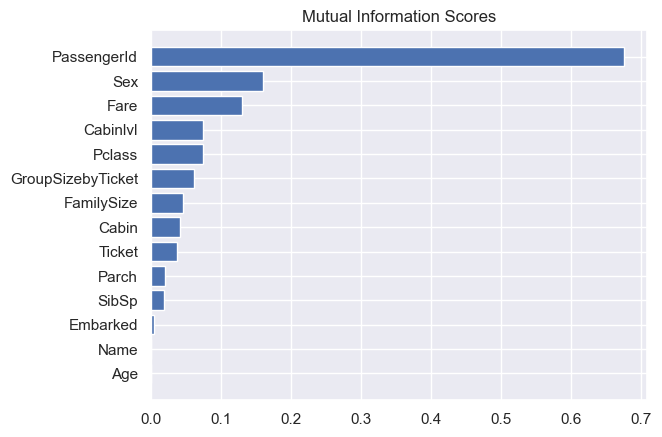

In [10]:
X_train_for_mi = X_train.copy()
for colname in X_train.select_dtypes("object"):
    X_train_for_mi[colname], _ = X_train[colname].factorize()
discrete_features = X_train.dtypes == int


scores = make_mi_scores(X_train_for_mi,y_train,discrete_features)
plot_mi_scores(scores)

IndexError: index 12 is out of bounds for axis 0 with size 12

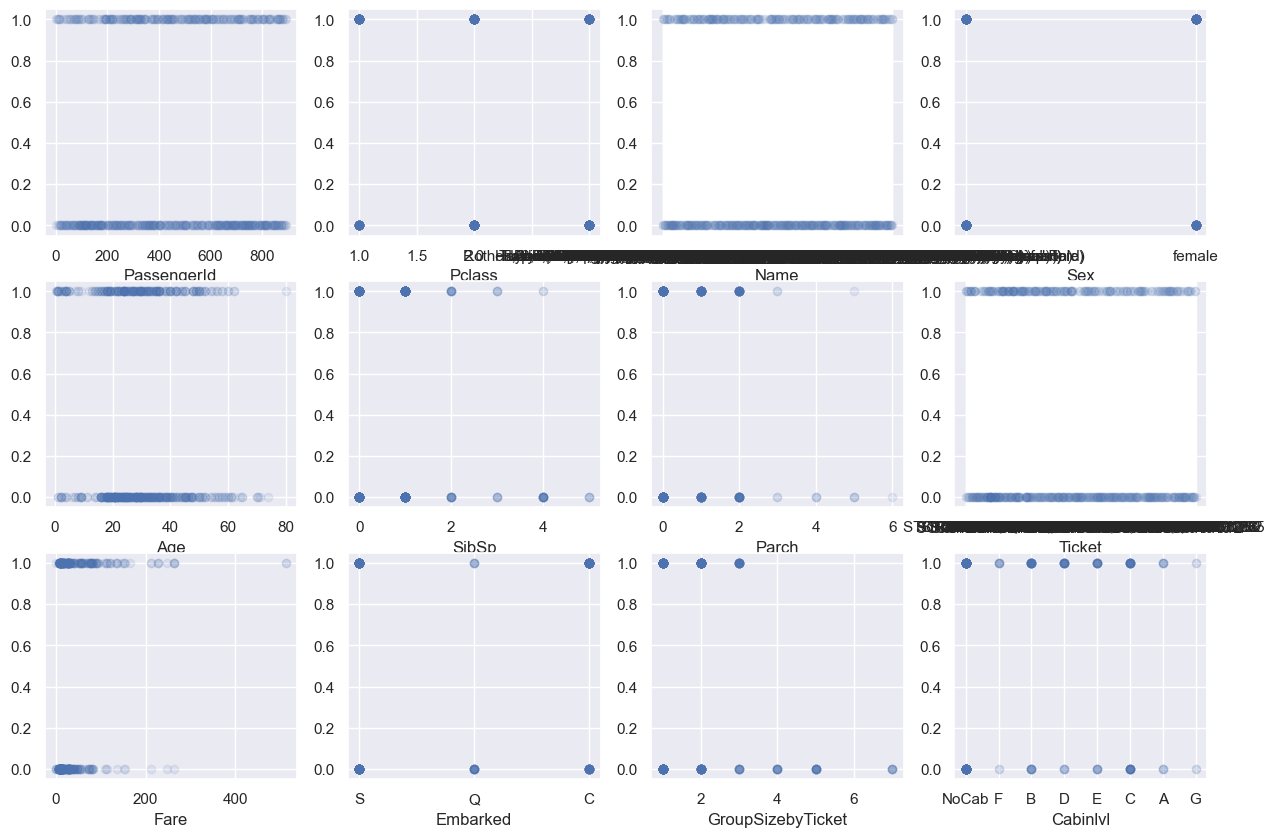

In [11]:
fig, axs = plt.subplots(3,4,figsize = (15,10))
axs = axs.flatten()
for i, feature in enumerate(X_train.columns.drop(['Cabin',])):
   axs[i].scatter(X_train[feature], y_train,alpha = 0.1)
   axs[i].set_xlabel(feature)
plt.tight_layout()
axs[5].set_xticks([])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

nepr_cols = ['Age','Fare']
ohe_cols = ['Pclass','Sex','Embarked','GroupSizebyTicket','Cabinlvl','FamilySize']
work_features = X_train.columns.drop(['Ticket','Cabin','Parch','SibSp'])

df1_transformer1 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown= 'ignore', drop = 'first'), ohe_cols),
    ('scaling',StandardScaler(), nepr_cols)
])
# OHE создаёт ортогональные (равноправные) фичи — модель сама определяет их веса.
# OrdinalEncoder навязывает порядок (например, пол → выживаемость на «Титанике»),
# что может быть уместно при наличии естественной иерархии.
# для этого сравним два трансформера, которые по разному преобразуют колонки для моделей

ohe_cols_for_transformer2 = ohe_cols.copy()
ohe_cols_for_transformer2.remove('Sex')
df1_transformer2 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown= 'ignore', drop = 'first'), ohe_cols_for_transformer2),
    ('ord_encod',OrdinalEncoder(),['Sex']),
    ('scaling',StandardScaler(), nepr_cols),
])
work_features

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'GroupSizebyTicket',
       'Cabinlvl', 'FamilySize'],
      dtype='object')

In [ ]:
ohe_cols

['Pclass', 'Sex', 'Embarked', 'GroupSizebyTicket', 'Cabinlvl', 'FamilySize']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    f1_score,
    auc
    )

df1_pipeline = Pipeline(steps =[
    ('ohe_and_scaling', df1_transformer1),
    ('classification',LogisticRegression(class_weight='balanced'))
])
df1_pipeline2 = Pipeline(steps =[
    ('ohe_and_scaling', df1_transformer2),
    ('classification',LogisticRegression())
])

rf_pipeline = Pipeline(steps = [
    ('ohe',df1_transformer1),
     ('rf', RandomForestClassifier(n_estimators=200, random_state=52))
])
                        


In [ ]:
def show_results(X_train, X_test, y_train,y_test,pipeline):
    
    model = pipeline.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1]
    plt.figure(figsize=(16,12))
    ax4 = plt.subplot(2, 3, 6)
    prec, recall, _ = precision_recall_curve(y_test,y_proba)
    ax4.text(0.05,0.55,f'Accuracy: {accuracy_score(y_test,y_pred):.3f}\nPrecision: {precision_score(y_test,y_pred):.3f}\n\
Recall: {recall_score(y_test,y_pred):.3f}\nf1_score:{f1_score(y_test,y_pred):.3f}\n\
Roc auc: {roc_auc_score(y_test,y_pred):.3f}\nPR AUC:{auc(recall,prec):.3f}', ha='left', fontsize=20, transform=ax4.transAxes)
    ax4.axis('off')   
#     print('Accuracy:',accuracy_score(y_test,y_pred))
#     print('Precision:',precision_score(y_test,y_pred))
#     print('Recall:',recall_score(y_test,y_pred))
#     print('f1_score:',f1_score(y_test,y_pred))
#     print('Roc auc:', roc_auc_score(y_test,y_pred))

    fpr, tpr, thresholds = roc_curve(y_test,y_proba)
    plt.subplot(2,2,1)
    plt.plot(fpr,tpr)
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],c='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc curve')


    far = fpr
    frr = 1 - tpr


    eer_idx = np.argmin(np.abs(far - frr))
    eer = (far[eer_idx] + frr[eer_idx]) / 2  # или просто far[eer_idx]

    plt.subplot(2,2,2)
    plt.plot(recall,prec)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.subplot2grid((2, 3), (1, 0), colspan=2)
    plt.plot(thresholds, far, label='FAR', color='red')
    #(False Acceptance Rate - доля чужих, признанных своими)
    plt.plot(thresholds, frr, label='FRR', color='blue')
    #(False Rejection Rate - доля своих, отвергнутых )
    plt.axvline(x=thresholds[eer_idx], color='green', linestyle='--', 
            label=f'EER() ≈ {eer:.3f} при пороге ≈ {thresholds[eer_idx]:.3f}')

    plt.xlabel('Threshold')
    plt.ylabel('Error')
    plt.title('FAR/FRR кривая')
    plt.legend()
    plt.grid(True)
    plt.xlim([0, 1])
    return recall,prec


In [ ]:
X_train['Ticket'].value_counts()

Ticket
347082              7
382652              5
CA 2144             5
S.O.C. 14879        5
347088              4
                   ..
A/5 3594            1
A/5 21172           1
349206              1
7545                1
C.A./SOTON 34068    1
Name: count, Length: 460, dtype: int64

c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


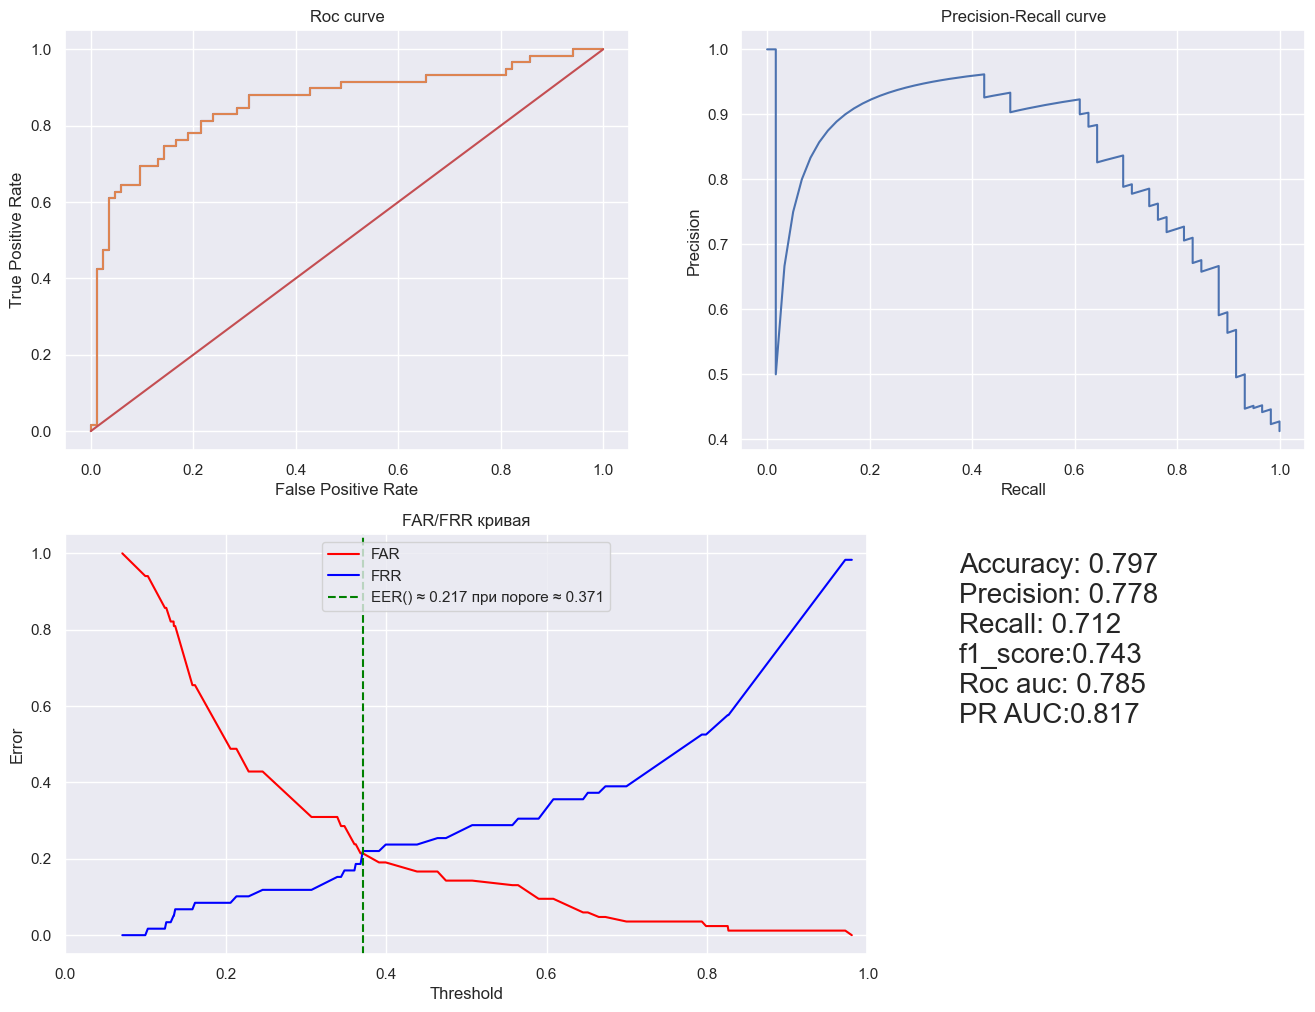

In [ ]:
rec_df1 , prec_df1 = show_results(X_train[work_features], X_test[work_features], y_train, y_test, df1_pipeline)

c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


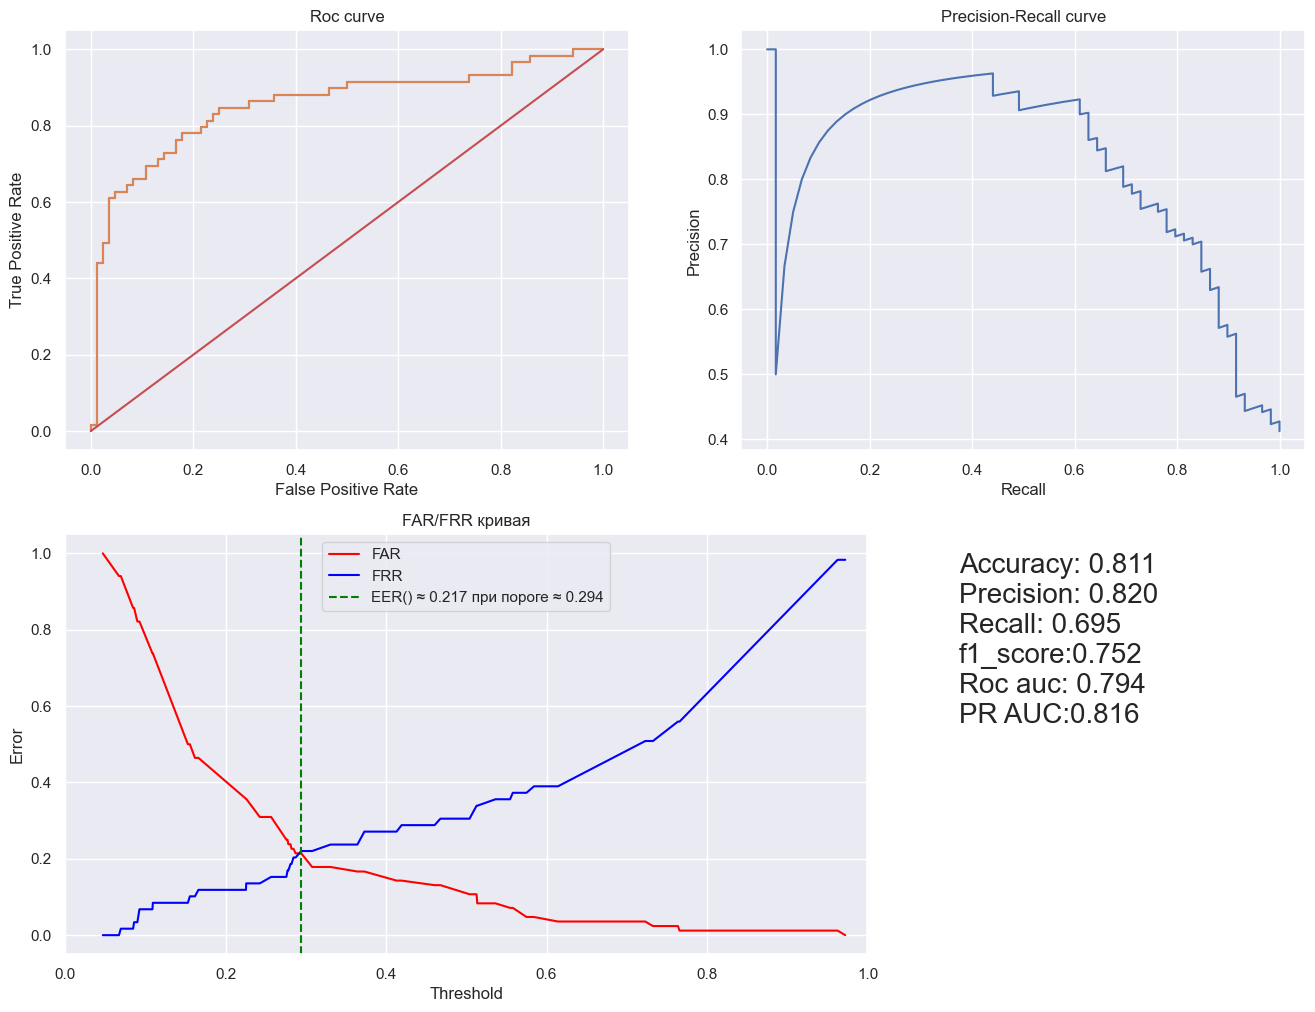

In [ ]:
rec_df1_2 , prec_df1_2 =  show_results(X_train[work_features], X_test[work_features], y_train, y_test, df1_pipeline2)

c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


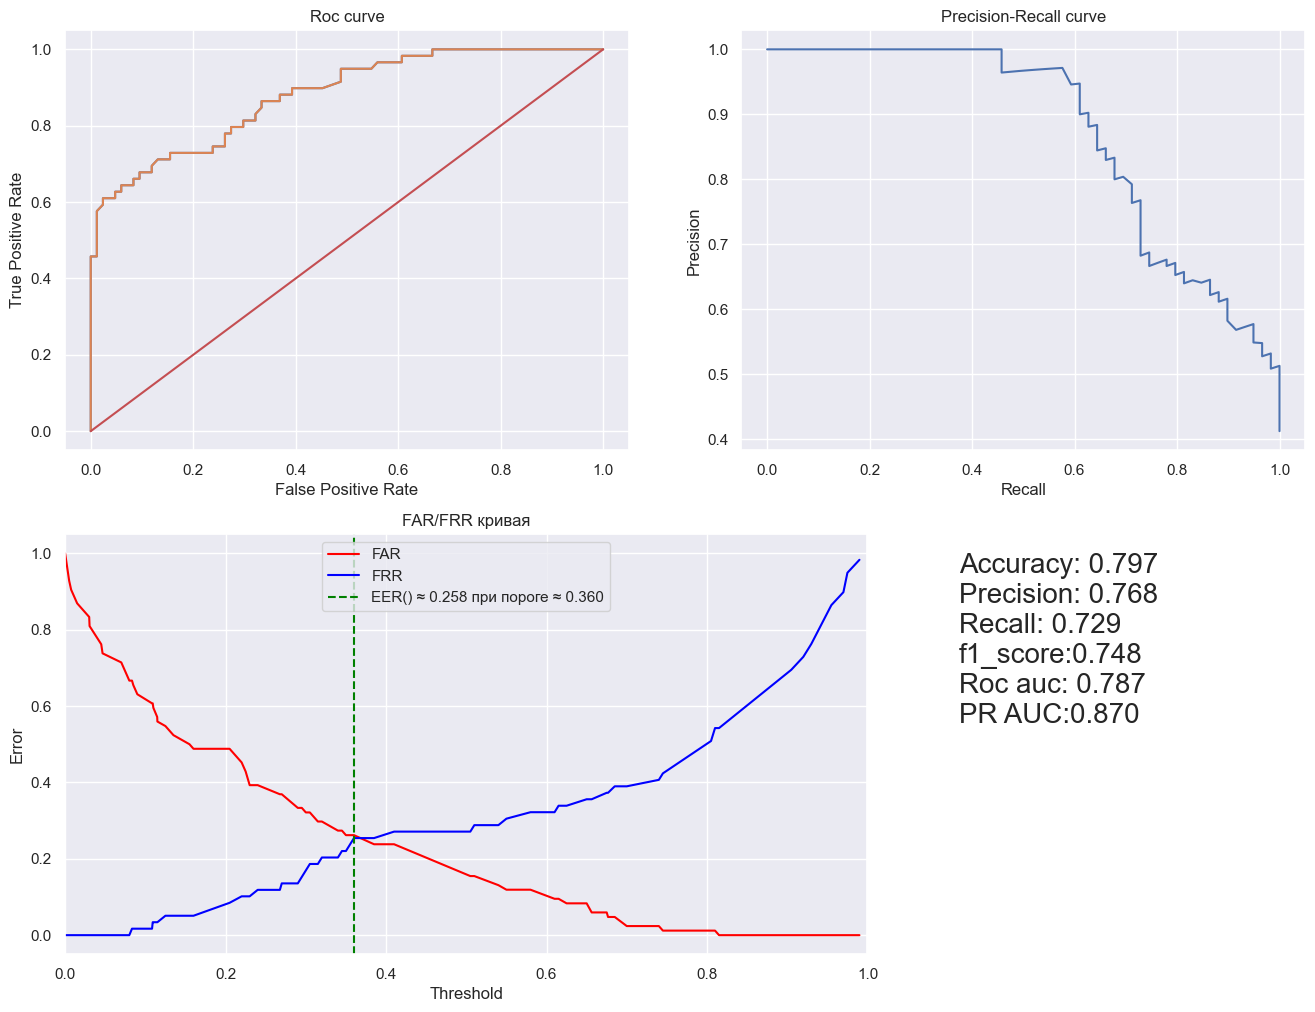

In [ ]:
rec_rf1 , prec_rf1 = show_results(X_train[work_features], X_test[work_features], y_train,y_test, rf_pipeline)

Text(0.5, 1.0, 'Comparison PR curves for classification problem ')

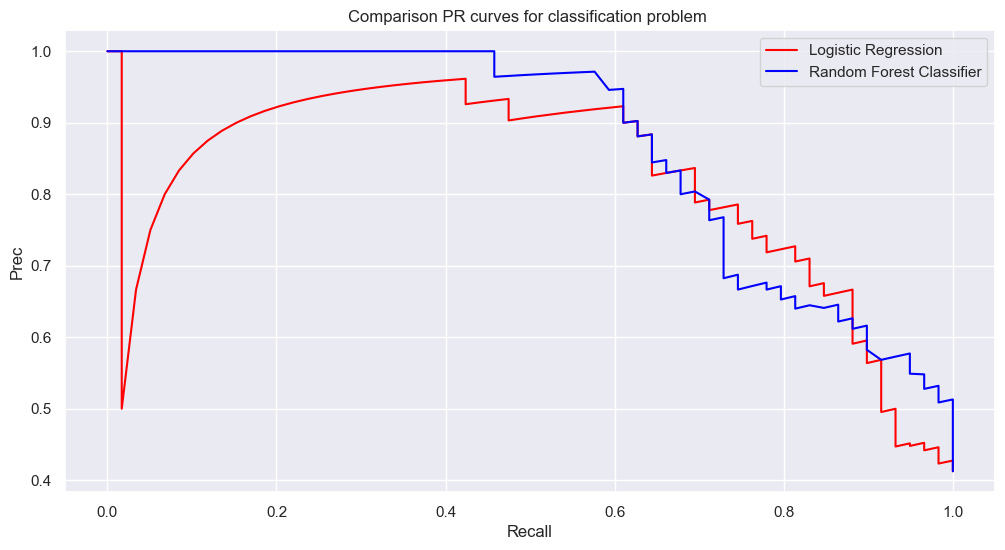

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(rec_df1,prec_df1,color = 'red',label = 'Logistic Regression')
plt.plot(rec_rf1,prec_rf1,color = 'blue',label = 'Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Prec')
plt.legend()
plt.title('Comparison PR curves for classification problem ')

In [ ]:
print(X_train.columns)
print(X_train2.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'GroupSizebyTicket', 'Cabinlvl', 'FamilySize'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [ ]:
df2 = dataframe.copy()

df2.loc[:,'Age'] = df2.Age.fillna(df2.Age.mean())
df2.loc[:,'Cabin'] = df2.Cabin.fillna('Nocab')
df2.loc[:,'Embarked'] = df2.Embarked.fillna('S')
df2.info()

y2 = df2['Survived']
X2 = df2.drop(columns = ['Survived'])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 52)
X_train2 = transformation(X_train2)
X_test2 = transformation(X_test2)
model = rf_pipeline.fit(X_train2,y_train2)
y_pred2 = model.predict(X_test2)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Sasha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(array([1.        , 0.98484848, 0.98484848, 0.96969697, 0.95454545,
        0.95454545, 0.95454545, 0.95454545, 0.93939394, 0.93939394,
        0.93939394, 0.93939394, 0.92424242, 0.90909091, 0.90909091,
        0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
        0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
        0.89393939, 0.89393939, 0.89393939, 0.89393939, 0.87878788,
        0.87878788, 0.87878788, 0.86363636, 0.86363636, 0.84848485,
        0.84848485, 0.84848485, 0.84848485, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333, 0.83333333, 0.83333333, 0.81818182, 0.81818182,
        0.8030303 , 0.8030303 , 0.78787879, 0.78787879, 0.78787879,
        0.78787879, 0.78787879, 0.77272727, 0.77272727, 0.77272727,
        0.75757576, 0.74242424, 0.72727273, 0.72727273, 0.72727273,
        0.72727273, 0.72727273, 0.72727273, 0.72727273, 0.72727273,
        0.71212121, 0.6969697 , 0.68181818, 0.68

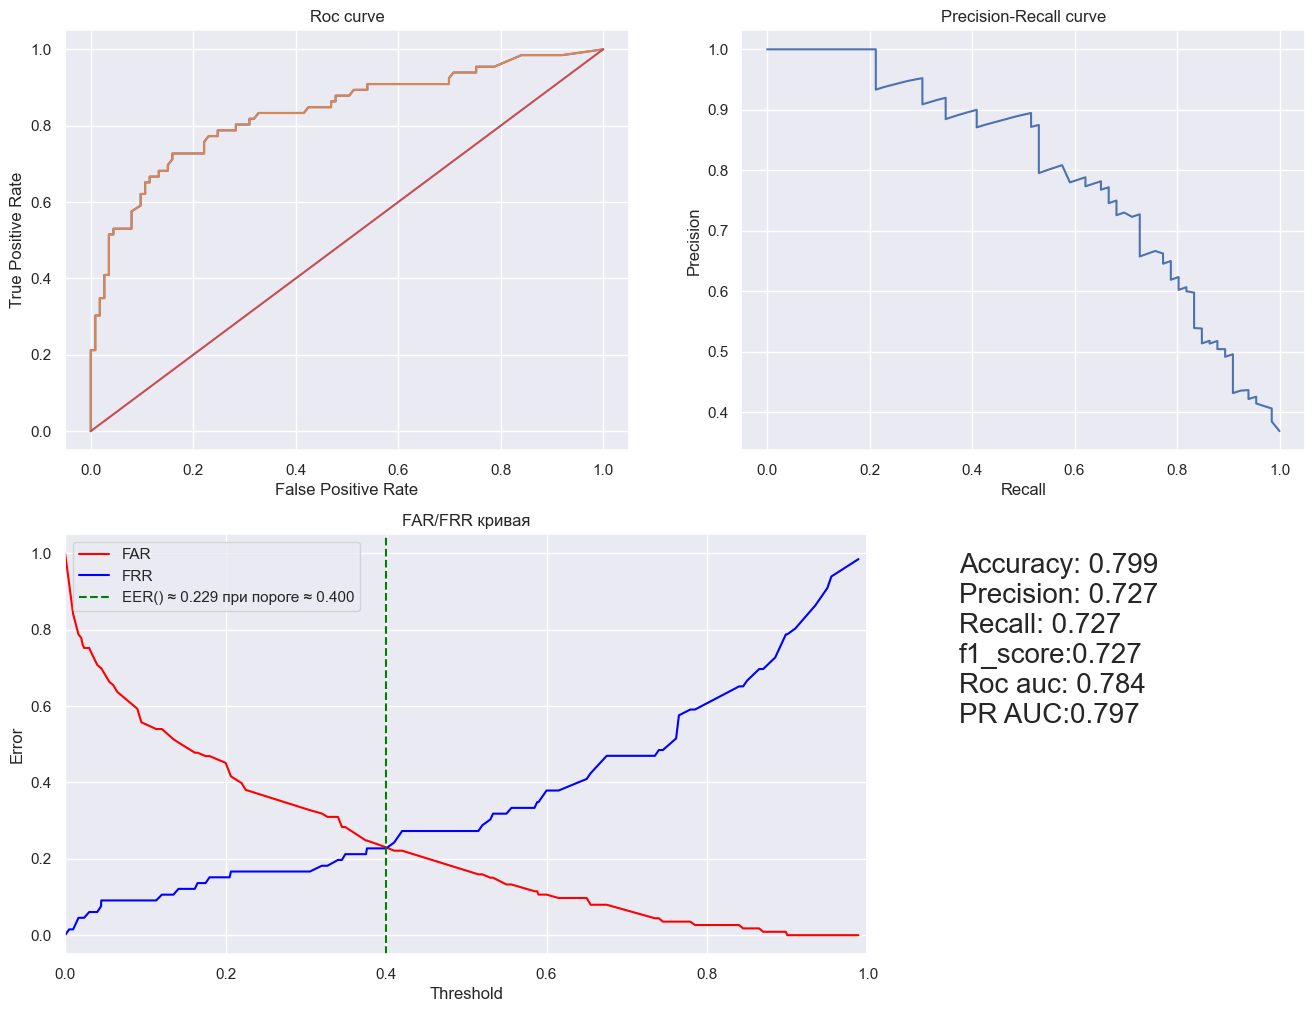

In [ ]:
show_results(X_train2, X_test2, y_train2, y_test2, rf_pipeline)

c:\Users\Sasha\pythone\kaggle\titanic
